In [0]:
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

In [0]:
w0 = np.random.uniform(-0.25, 0.25)         # Bias
w1 = np.random.uniform(-1, 1)
w2 = np.random.uniform(-1, 1)
W_Original = [w0, w1, w2]
print ('The original weights: ', W_Original)

The original weights:  [0.08314449589437056, 0.4259528870635514, 0.6875107540301049]


In [0]:
S = np.random.uniform(-1, 1, size=(100, 2)) 
S0 = []
S1 = []
for i in S:
    if (1*w0)+(i[0]*w1)+(i[1]*w2) >= 0:
            S1.append([i[0]] + [i[1]] + [0])
    elif (i[0]*w1)+(i[1]*w2) < 0:
            S0.append([i[0]] + [i[1]] + [1])

dataset = S0 + S1                      # Complete dataset
print(dataset)


[[-0.990816057465397, -0.07359433415033068, 1], [-0.16329306405103305, -0.8860543904892764, 1], [-0.1982240928815855, -0.3264169072076961, 1], [-0.5711288429551544, -0.627014495526514, 1], [-0.8036476012859797, 0.06032201536227433, 1], [-0.5365715528861492, -0.9681989527447901, 1], [-0.37357279648980235, -0.29962277353994016, 1], [0.37931652636614466, -0.6788019752317438, 1], [0.5354957413176766, -0.7134447059022098, 1], [0.2587407296618316, -0.442607725084428, 1], [-0.686998778111175, 0.16029925911484155, 1], [-0.524424934720316, -0.8104004568062657, 1], [-0.04698373194517402, -0.11198038044310543, 1], [-0.18402144602793902, -0.7848799595414053, 1], [-0.20112061117443125, -0.35756277129380987, 1], [0.1438564697323168, -0.5399343699871331, 1], [-0.921641583142996, -0.13434768099225924, 1], [-0.23539697309445073, -0.3364266263686424, 1], [-0.5366384344954209, -0.8277900211568345, 1], [-0.05015079778795739, -0.3759478363192774, 1], [0.24045076618044892, -0.5478840623084258, 1], [-0.76763

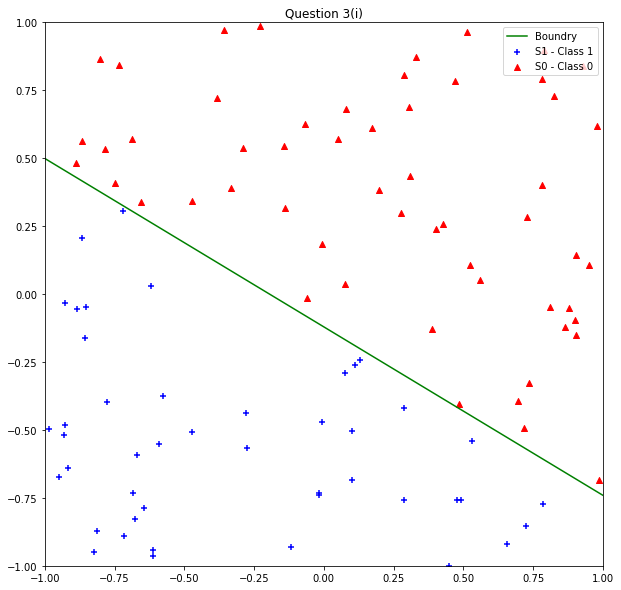

In [0]:
x1 = -(w0-w2)/w1
x2 = -(w0+w2)/w1
X = np.array([x1, x2])
Y = np.array([-1.0, +1.0])

S1_x = []
S1_y = []
S0_x = []
S0_y = []

for i in S0:
    S0_x.append(i[0])
    S0_y.append(i[1])
for i in S1:
    S1_x.append(i[0])
    S1_y.append(i[1])

fig, ax = plt.subplots(figsize=(10,10))
blue = plt.scatter(S0_x, S0_y, c ='b', marker ='+', label='S1 - Class 1')
red = plt.scatter(S1_x, S1_y, c='r',marker ='^', label='S0 - Class 0')
line = ax.plot(X, Y, c = 'green', label='Boundry')
plt.title('Question 3(i)')
plt.legend(loc="upper right")
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.show()

## **Question-3(j) to Question-3(o) starts from here**

In [0]:
# Unit Step Activation Function  
def activation_fn(x):
    if x >= 0:
        y = 1
    else:
        y = 0
    return y

In [0]:
w0_1 = np.random.uniform(-1, 1)
w1_1 = np.random.uniform(-1, 1)
w2_1 = np.random.uniform(-1, 1)

W = []
W = [w0_1, w1_1, w2_1]

def misclassified(dataset, W):
    misclassifications = 0
    for each in dataset:
        y = (W[0]+(each[0]*W[1])+(each[1]*W[2]))
        y = activation_fn(y)
        if y != each[2]:
            misclassifications = misclassifications +1
    return misclassifications
a = misclassified(dataset, W)
print ('Number of misclassifications: ', a)

Number of misclassifications:  78


In [0]:
def perceptron_training(omega):
    epoch = 0
    omegas = []
    missed = []
    while (misclassified(dataset,omega)!=0):
        missed.append(misclassified(dataset,omega))
        print ('Number of missclassifications: ', missed[epoch])
        epoch = epoch + 1
        print ('Epoch Number: ', epoch)
        for each in range(len(dataset)):
            y = omega[0] + (dataset[each][0]*omega[1]) + (dataset[each][1]*omega[2])
            y = activation_fn(y)
            updated_input =[1]+dataset[each][0:2]
            desired_output = dataset[each][2]
            difference = desired_output-y
            if difference != 0:
                updated_input[0]= updated_input[0]*learning_rate*difference
                updated_input[1]= updated_input[1]*learning_rate*difference
                updated_input[2]= updated_input[2]*learning_rate*difference
                omega[0] = omega[0]+updated_input[0]
                omega[1] = omega[1]+updated_input[1]
                omega[2] = omega[2]+updated_input[2]
        print ('Updated weights: ', omega)
        omegas.append(omega)
    final_misclassification = misclassified(dataset,omega)
    print ('Number of missclassifications: ', final_misclassification)
    print ('Final weights: ', omegas[-1])
    return omegas, missed

Initial weight:  [0.3455166421423075, 0.39601140076330177, 0.3454875669703523]
Number of missclassifications:  78
Epoch Number:  1
Updated weights:  [-1.6544833578576925, -0.9539984737719982, -0.6209755140968654]
Number of missclassifications:  45
Epoch Number:  2
Updated weights:  [-0.6544833578576925, -0.7712923624548269, -2.0138185798366495]
Number of missclassifications:  7
Epoch Number:  3
Updated weights:  [-1.6544833578576925, -1.722509459074238, -1.628905426628626]
Number of missclassifications:  27
Epoch Number:  4
Updated weights:  [-1.6544833578576925, -1.9473359799828631, -2.0971047329278187]
Number of missclassifications:  21
Epoch Number:  5
Updated weights:  [-1.6544833578576925, -2.1721625008914884, -2.565304039227012]
Number of missclassifications:  18
Epoch Number:  6
Updated weights:  [-1.6544833578576925, -2.377674097102526, -3.015691039484892]
Number of missclassifications:  16
Epoch Number:  7
Updated weights:  [-0.6544833578576925, -2.5923791647380368, -3.7007588

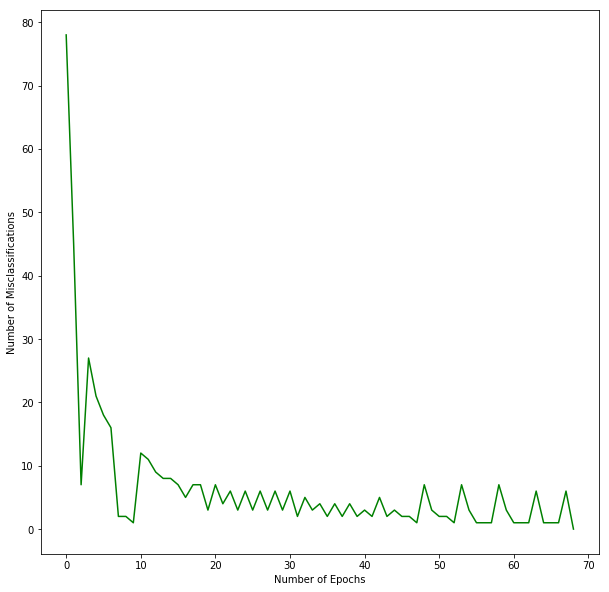

In [0]:
learning_rate = 1
print ('Initial weight: ' , W)
omegas=[]
omegas, missed = perceptron_training(W)
n_epochs = range(len(omegas)+1)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(n_epochs, missed+[0], c = 'green')
plt.ylabel('Number of Misclassifications')
plt.xlabel('Number of Epochs')
plt.show()

Initial weight:  [0.2588479710175262, -0.24915802982893864, 0.2112495241077419]
Number of missclassifications:  51
Epoch Number:  1
Updated weights:  [-9.741152028982473, 14.161399081504086, 9.381836820010815]
Number of missclassifications:  32
Epoch Number:  2
Updated weights:  [0.2588479710175271, 16.471753888859887, 15.042923869028758]
Number of missclassifications:  0
Final weights:  [0.2588479710175271, 16.471753888859887, 15.042923869028758]


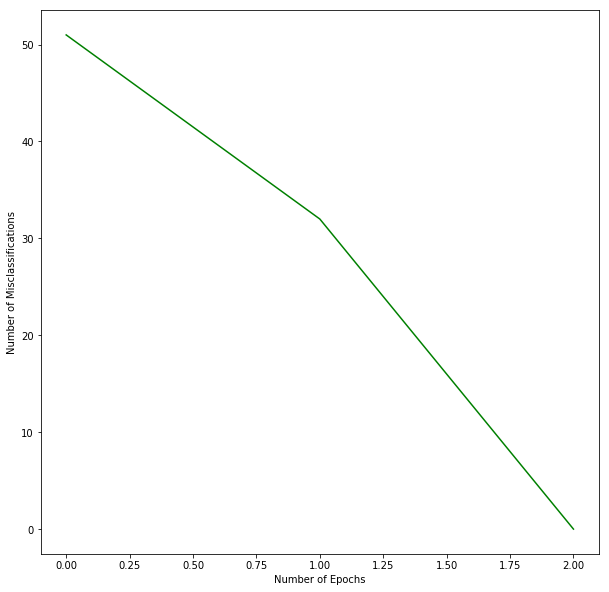

In [0]:
omega = [w0_1, w1_1, w2_1]
learning_rate = 10
print ('Initial weight: ' , omega)
omegas=[]
omegas, missed = perceptron_training(omega)
n_epochs = range(len(omegas)+1)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(n_epochs, missed+[0], c = 'green')
plt.ylabel('Number of Misclassifications')
plt.xlabel('Number of Epochs')
plt.show()

Initial weight:  [0.2588479710175262, -0.24915802982893864, 0.2112495241077419]
Number of missclassifications:  51
Epoch Number:  1
Updated weights:  [-0.1411520289824738, 0.17648968955502742, 0.091894615052617]
Number of missclassifications:  38
Epoch Number:  2
Updated weights:  [-0.041152028982473804, 0.2550562587263424, 0.1195543623382003]
Number of missclassifications:  7
Epoch Number:  3
Updated weights:  [-0.041152028982473804, 0.31068451663224705, 0.13667610382814005]
Number of missclassifications:  6
Epoch Number:  4
Updated weights:  [-0.041152028982473804, 0.36544738360506324, 0.13860242133482492]
Number of missclassifications:  7
Epoch Number:  5
Updated weights:  [0.0588479710175262, 0.3370996946242775, 0.22817410193307366]
Number of missclassifications:  0
Final weights:  [0.0588479710175262, 0.3370996946242775, 0.22817410193307366]


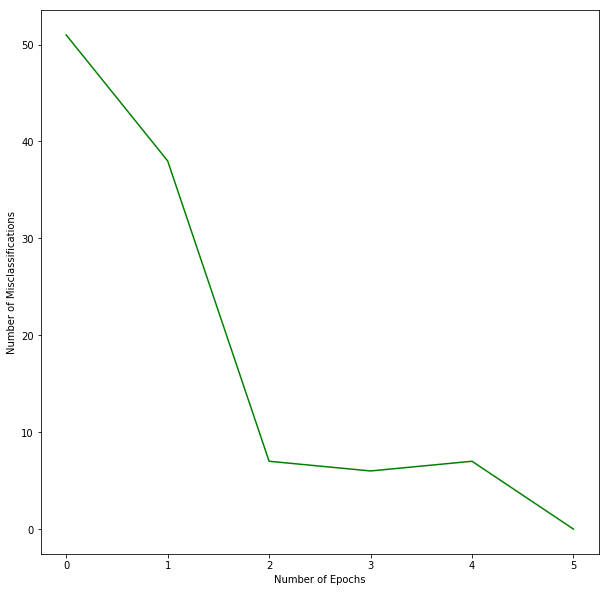

In [0]:
omega = [w0_1, w1_1, w2_1]
learning_rate = 0.1
print ('Initial weight: ' , omega)
omegas=[]
omegas, missed = perceptron_training(omega)
n_epochs = range(len(omegas)+1)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(n_epochs, missed+[0], c = 'green')
plt.ylabel('Number of Misclassifications')
plt.xlabel('Number of Epochs')
plt.show()

# Question 3 (p) : Experiment (n=1000)

In [0]:
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

In [0]:
w0 = np.random.uniform(-0.25, 0.25)         # Bias
w1 = np.random.uniform(-1, 1)
w2 = np.random.uniform(-1, 1)
W_Original = [w0, w1, w2]
print ('The original weights: ', W_Original)

The original weights:  [-0.18851997298004008, 0.6555735620480692, 0.4739549908056575]


In [0]:
S = np.random.uniform(-1, 1, size=(1000, 2)) 
S0 = []
S1 = []
for i in S:
    if (1*w0)+(i[0]*w1)+(i[1]*w2) >= 0:
            S1.append([i[0]] + [i[1]] + [0])
    elif (i[0]*w1)+(i[1]*w2) < 0:
            S0.append([i[0]] + [i[1]] + [1])

dataset = S0 + S1                      # Complete dataset


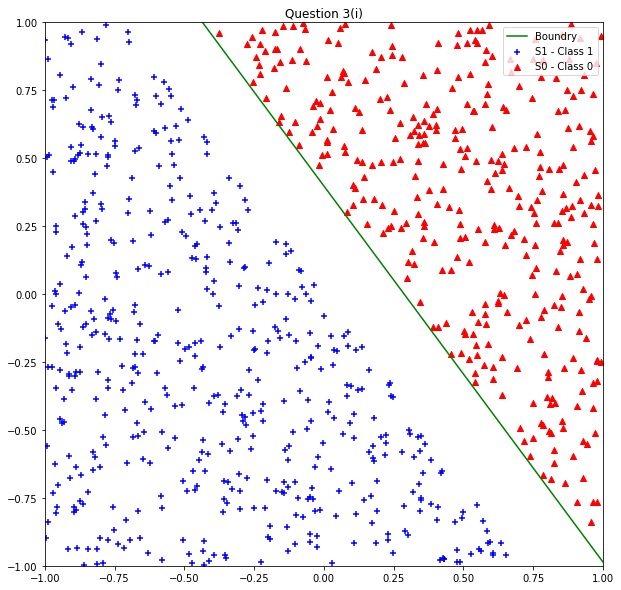

In [0]:
x1 = -(w0-w2)/w1
x2 = -(w0+w2)/w1
X = np.array([x1, x2])
Y = np.array([-1.0, +1.0])

S1_x = []
S1_y = []
S0_x = []
S0_y = []

for i in S0:
    S0_x.append(i[0])
    S0_y.append(i[1])
for i in S1:
    S1_x.append(i[0])
    S1_y.append(i[1])

fig, ax = plt.subplots(figsize=(10,10))
blue = plt.scatter(S0_x, S0_y, c ='b', marker ='+', label='S1 - Class 1')
red = plt.scatter(S1_x, S1_y, c='r',marker ='^', label='S0 - Class 0')
line = ax.plot(X, Y, c = 'green', label='Boundry')
plt.title('Question 3(i)')
plt.legend(loc="upper right")
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.show()

In [0]:
# Unit Step Activation Function  
def activation_fn(x):
    if x >= 0:
        y = 1
    else:
        y = 0
    return y

In [0]:
w0_1 = np.random.uniform(-1, 1)
w1_1 = np.random.uniform(-1, 1)
w2_1 = np.random.uniform(-1, 1)

W = []
W = [w0_1, w1_1, w2_1]

def misclassified(dataset, W):
    misclassifications = 0
    for each in dataset:
        y = (W[0]+(each[0]*W[1])+(each[1]*W[2]))
        y = activation_fn(y)
        if y != each[2]:
            misclassifications = misclassifications +1
    return misclassifications
a = misclassified(dataset, W)
print ('Number of misclassifications: ', a)

Number of misclassifications:  272


In [0]:
def perceptron_training(omega):
    epoch = 0
    omegas = []
    missed = []
    while (misclassified(dataset,omega)!=0):
        missed.append(misclassified(dataset,omega))
        print ('Number of missclassifications: ', missed[epoch])
        epoch = epoch + 1
        print ('Epoch Number: ', epoch)
        for each in range(len(dataset)):
            y = omega[0] + (dataset[each][0]*omega[1]) + (dataset[each][1]*omega[2])
            y = activation_fn(y)
            updated_input =[1]+dataset[each][0:2]
            desired_output = dataset[each][2]
            difference = desired_output-y
            if difference != 0:
                updated_input[0]= updated_input[0]*learning_rate*difference
                updated_input[1]= updated_input[1]*learning_rate*difference
                updated_input[2]= updated_input[2]*learning_rate*difference
                omega[0] = omega[0]+updated_input[0]
                omega[1] = omega[1]+updated_input[1]
                omega[2] = omega[2]+updated_input[2]
        print ('Updated weights: ', omega)
        omegas.append(omega)
    final_misclassification = misclassified(dataset,omega)
    print ('Number of missclassifications: ', final_misclassification)
    print ('Final weights: ', omegas[-1])
    return omegas, missed

Initial weight:  [0.765733168651545, -0.9216089741725613, -0.02301908552848886]
Number of missclassifications:  272
Epoch Number:  1
Updated weights:  [-0.23426683134845505, -1.299102637458887, -0.4039261859537211]
Number of missclassifications:  123
Epoch Number:  2
Updated weights:  [-1.234266831348455, -1.653728996707133, -1.1147920286284925]
Number of missclassifications:  350
Epoch Number:  3
Updated weights:  [-1.234266831348455, -2.4799644712872944, -1.1915701331917414]
Number of missclassifications:  257
Epoch Number:  4
Updated weights:  [-0.23426683134845505, -2.346960537167263, -2.1067521609862876]
Number of missclassifications:  63
Epoch Number:  5
Updated weights:  [-0.23426683134845505, -2.561480947575158, -2.2701468749506066]
Number of missclassifications:  59
Epoch Number:  6
Updated weights:  [-0.23426683134845505, -2.776001357983053, -2.4335415889149257]
Number of missclassifications:  52
Epoch Number:  7
Updated weights:  [-0.23426683134845505, -2.990521768390948, -2

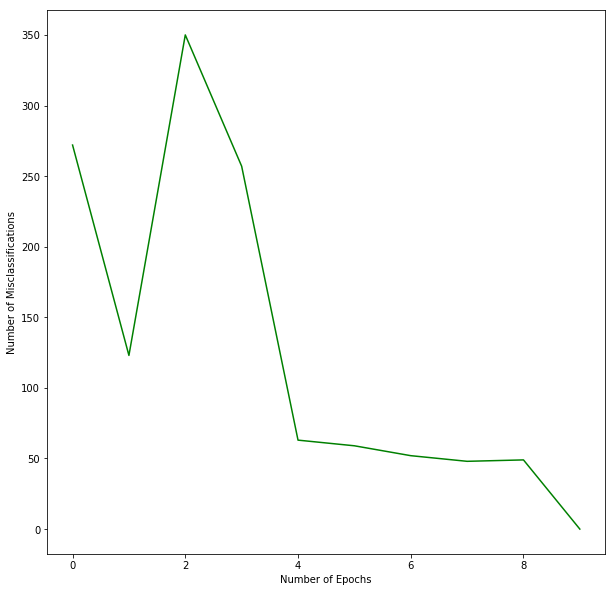

In [0]:
learning_rate = 1
print ('Initial weight: ' , W)
omegas=[]
omegas, missed = perceptron_training(W)
n_epochs = range(len(omegas)+1)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(n_epochs, missed+[0], c = 'green')
plt.ylabel('Number of Misclassifications')
plt.xlabel('Number of Epochs')
plt.show()

Initial weight:  [0.765733168651545, -0.9216089741725613, -0.02301908552848886]
Number of missclassifications:  272
Epoch Number:  1
Updated weights:  [-9.234266831348455, -4.6965456070358185, -3.8320900897808112]
Number of missclassifications:  512
Epoch Number:  2
Updated weights:  [0.7657331686515452, -9.1965206398275, -9.564286038784239]
Number of missclassifications:  21
Epoch Number:  3
Updated weights:  [0.7657331686515452, -17.171739117898447, -7.778608849485397]
Number of missclassifications:  33
Epoch Number:  4
Updated weights:  [-9.234266831348455, -18.62823065817469, -16.735370130996486]
Number of missclassifications:  239
Epoch Number:  5
Updated weights:  [0.7657331686515452, -26.340081784787365, -12.868687885762052]
Number of missclassifications:  31
Epoch Number:  6
Updated weights:  [0.7657331686515452, -29.85165106619235, -14.596753834078784]
Number of missclassifications:  33
Epoch Number:  7
Updated weights:  [0.7657331686515452, -33.363220347597334, -16.3248197823

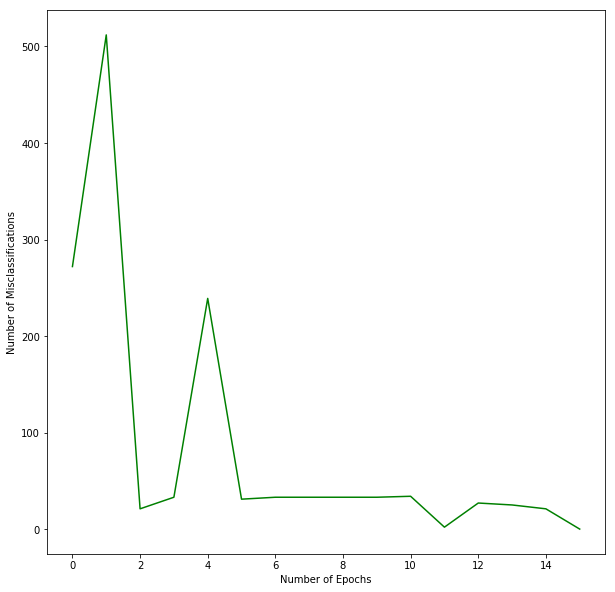

In [0]:
omega = [w0_1, w1_1, w2_1]
learning_rate = 10
print ('Initial weight: ' , omega)
omegas=[]
omegas, missed = perceptron_training(omega)
n_epochs = range(len(omegas)+1)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(n_epochs, missed+[0], c = 'green')
plt.ylabel('Number of Misclassifications')
plt.xlabel('Number of Epochs')
plt.show()

Initial weight:  [0.765733168651545, -0.9216089741725613, -0.02301908552848886]
Number of missclassifications:  272
Epoch Number:  1
Updated weights:  [0.06573316865154505, -0.9796497838803222, -0.5414902488859972]
Number of missclassifications:  9
Epoch Number:  2
Updated weights:  [0.16573316865154505, -0.9161303745488147, -0.632949198111554]
Number of missclassifications:  0
Final weights:  [0.16573316865154505, -0.9161303745488147, -0.632949198111554]


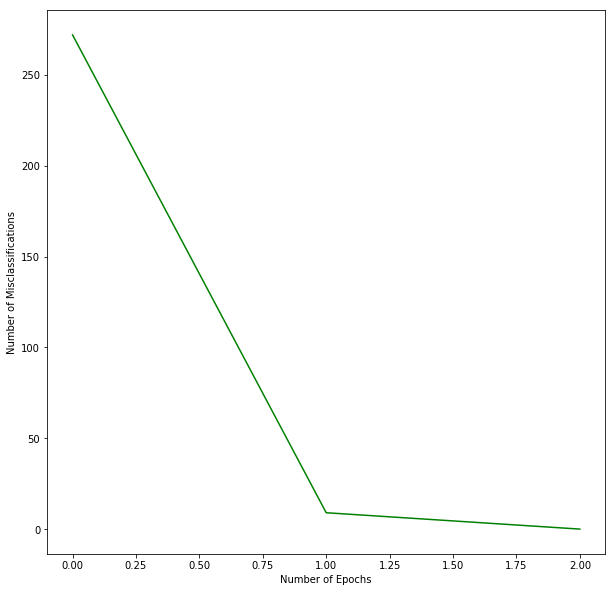

In [0]:
omega = [w0_1, w1_1, w2_1]
learning_rate = 0.1
print ('Initial weight: ' , omega)
omegas=[]
omegas, missed = perceptron_training(omega)
n_epochs = range(len(omegas)+1)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(n_epochs, missed+[0], c = 'green')
plt.ylabel('Number of Misclassifications')
plt.xlabel('Number of Epochs')
plt.show()